# Visualisation

This notebook contain the codes for creating figures for the CCN 2025 paper.

## Result 1: Training Stats

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def _smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

In [41]:
stats = pd.read_csv('logs/27.01.2025.csv').dropna(axis=1)

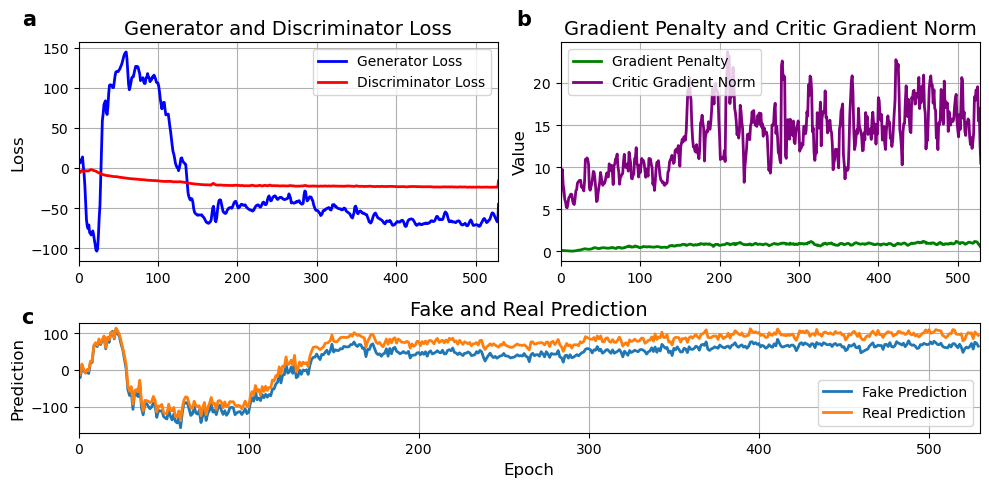

In [90]:
import matplotlib.gridspec as gridspec

lim = len(stats)

# Create a figure
fig = plt.figure(figsize=(10, 5))

# Create a GridSpec with 2 rows and 2 columns
gs = gridspec.GridSpec(2, 2, height_ratios=[2, 1], width_ratios=[1, 1])

# First subplot
ax1 = fig.add_subplot(gs[0, 0])
ax1.plot(_smooth(stats['g_loss'], 3), label='Generator Loss', color='blue', linestyle='-', linewidth=2)
ax1.plot(_smooth(stats['d_loss'], 3), label='Discriminator Loss', color='red', linestyle='-', linewidth=2)
ax1.legend()
ax1.grid(True)
ax1.set_ylabel('Loss', fontsize=12)
ax1.set_xlim([0, lim-2])
ax1.set_title('Generator and Discriminator Loss', fontdict={'fontsize': 14})
ax1.text(-0.1, 1.15, 'a', transform=ax1.transAxes, fontsize=15, fontweight='bold', va='top', ha='right')

# Second subplot
ax2 = fig.add_subplot(gs[0, 1])
ax2.plot(_smooth(stats['_gp'], 5), label='Gradient Penalty', color='green', linestyle='-', linewidth=2)
ax2.plot(_smooth(stats['critic_grad_norm'], 5), label='Critic Gradient Norm', color='purple', linestyle='-', linewidth=2)
ax2.legend()
ax2.grid(True)
ax2.set_xlim([0, lim-2])
ax2.set_ylabel('Value', fontsize=12)
ax2.set_title('Gradient Penalty and Critic Gradient Norm', fontdict={'fontsize': 14})
ax2.text(-0.07, 1.15, 'b', transform=ax2.transAxes, fontsize=15, fontweight='bold', va='top', ha='right')

# Third subplot  # TODO: Add std
ax3 = fig.add_subplot(gs[1, :])
ax3.plot(stats['_fake_pred'], label='Fake Prediction',  linestyle='-', linewidth=2)
ax3.plot(stats['_real_pred'], label='Real Prediction', linestyle='-', linewidth=2)
ax3.legend()
ax3.grid(True)
ax3.set_xlim([0, lim])
ax3.set_xlabel('Epoch', fontsize=12)
ax3.set_ylabel('Prediction', fontsize=12)
ax3.set_title('Fake and Real Prediction', fontdict={'fontsize': 14})
ax3.text(-0.05, 1.15, 'c', transform=ax3.transAxes, fontsize=15, fontweight='bold', va='top', ha='right')

plt.tight_layout()
plt.show()

## Result 2: Compare real and generated data